In [1]:
import random
import matplotlib.pyplot as plt
from matplotlib.cm import ScalarMappable
from matplotlib.colors import LinearSegmentedColormap, Normalize
import igraph as ig

import pandas as pd
import numpy as np
import os
import math
import re
from collections import Counter
import scipy.stats
import seaborn as sns
from matplotlib.font_manager import FontProperties  # 导入FontProperties
import warnings
warnings.filterwarnings("ignore")

import networkx as nx

In [5]:
milestones = pd.read_excel(r'E:\netData\APS\2 Papers and institutions\MileStone-papers.xlsx')

In [18]:
f2 = pd.read_csv(r'E:\netData\APS\3 properties\DCCC2010.zip')

In [2]:
ff = pd.read_csv(r'E:\netData\APS\3 properties\nodepro2010.zip')

In [22]:
ff['DC'] = f2['DC']
ff['CC'] = f2['CC']

In [9]:
def get_type(x):
    if x in milestones['id'].values:
        return "milestone"
    return "non-milestone"
ff['type'] = ff['id'].apply(get_type)

# paper-level IR

In [23]:
def get_IR(threshold , v , ff):
    k = int(np.floor(len(ff)*threshold))
    ff2 = ff.sort_values([v],ascending= False)
    ff21 = ff2.head(k)
    d = len(ff21[ff21['type']=='milestone'])/130
    return d

In [24]:
thresholdlst = [0.001,0.005,0.01,0.02,0.05]

In [25]:
threshold = 0.01
vlst = ['DC', 'CC', 'CD', 'degree', 'h', 'pagerank']

In [26]:
dlst = [get_IR(threshold , v , ff) for v in vlst]

In [27]:
dlst

[0.8461538461538461,
 0.5769230769230769,
 0.07692307692307693,
 0.8615384615384616,
 0.8692307692307693,
 0.9846153846153847]

In [28]:
def draw_bar(dlst , path , label):
    f, ax = plt.subplots(figsize=(7, 7))
    c = ['#6E2C00','#A04000','#BA4A00','#154360','#0B5345','#21618C']
    y_pos = [1,2,3,4,5,6]

    plt.barh(y_pos,dlst,align='center', color= c,alpha=0.9,capsize=10)

    plt.yticks(y_pos,['DC', 'CC', 'CD', 'degree', 'h', 'pagerank'],fontsize = 20)

    plt.xticks(fontsize=20)
    plt.xlabel('IR',fontsize = 25)
    plt.title('IR z={}'.format(label),fontsize = 30)
    
    #ax.vlines(dlst[3],0,8, linestyles='dashed',colors = '#154360')

    #plt.savefig("F:/目前研究项目/APS分析/SCIENTOMETRICS SDC SCC/fig/fig 4/{}.pdf".format(path),bbox_inches = 'tight')

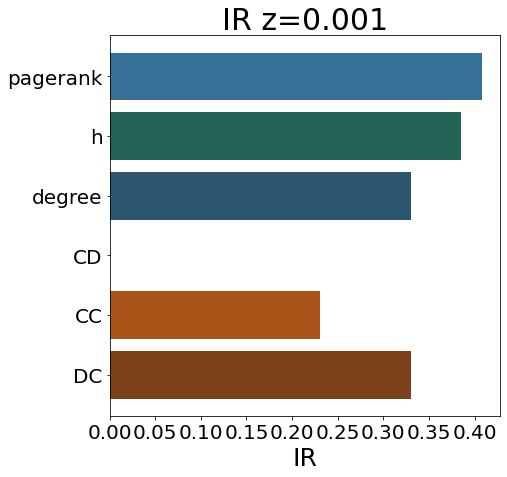

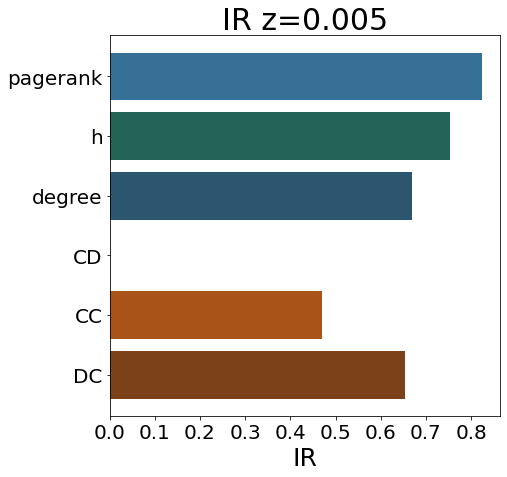

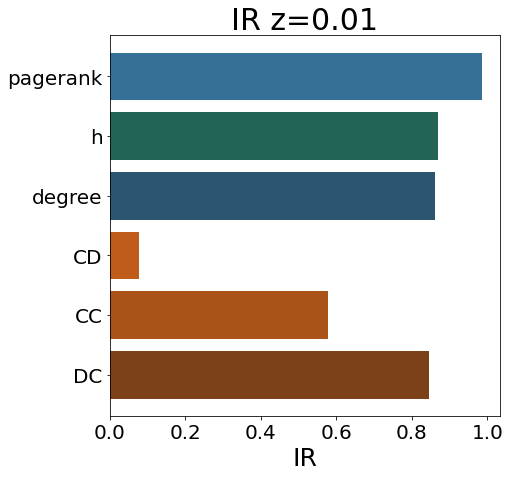

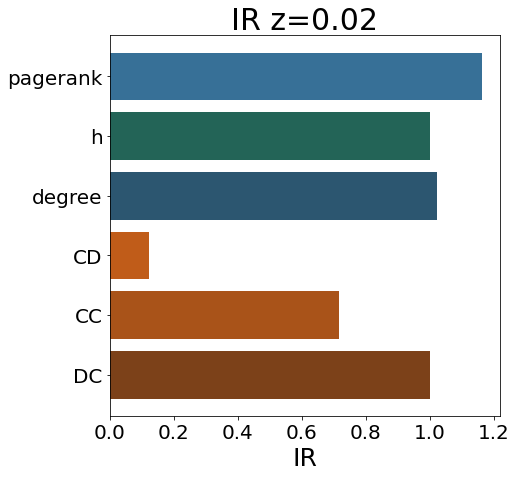

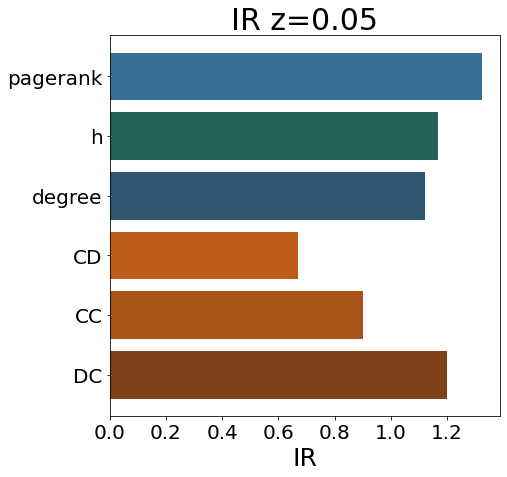

In [29]:
for i in range(len(thresholdlst)):
    threshold = thresholdlst[i]
    path = i
    label = str(threshold)
    dlst = [get_IR(threshold , v , ff) for v in vlst]
    draw_bar(dlst , path , label)